### Esercizio di gruppo 19.02.25 

### Break1:
1)Given the dataframe attached "df1.csv", what is the distribution of "y"?

2)Given the dataframe attached "df2.csv", which columns contributed to creating the column "f"?

### 1.

*Importare le librerie e caricamento dataset*

In [19]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')

print(df1.head())
print(df2.head())

   Unnamed: 0  x           y
0           0  A   93.764711
1           1  A  109.293028
2           2  A   89.244395
3           3  A  102.749129
4           4  A   78.126267
   Unnamed: 0          a          b          c  d         x          y  z  h  \
0           0  -6.372794 -16.577755  48.961232  0 -0.318640 -16.259115  0  0   
1           1 -17.485544  21.215169  49.007079  1 -0.874277  22.089446  0  0   
2           2 -28.319169  59.144883  47.702685  0 -1.415958  60.560841  0  0   
3           3   3.051243 -43.235331  51.225396  1  0.152562 -43.387893  0  0   
4           4   3.945007  13.971416  50.365315  0  0.197250  13.774166  0  0   

           g          f  
0  49.279872  50.053086  
1  49.881356  49.329011  
2  49.118644  46.193410  
3  51.072834  50.695365  
4  50.168065  51.094800  


*Indagine in merito a 'y'*

In [20]:
print(df1['y'].describe())

count    30000.000000
mean        58.291331
std         39.085985
min        -53.277312
25%         25.710397
50%         60.664025
75%         95.006285
max        145.226340
Name: y, dtype: float64


*Visualizzazione distribuzione y*

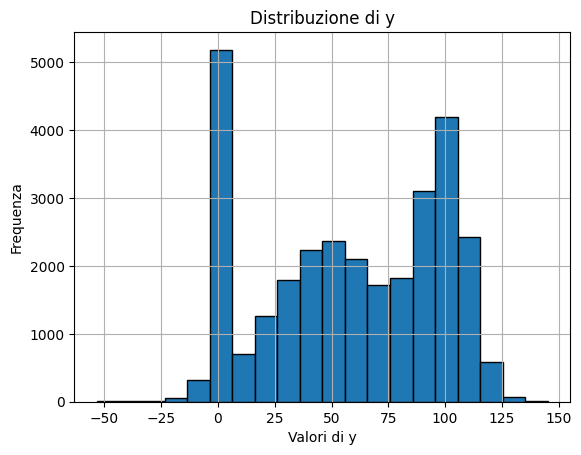

In [21]:
import matplotlib.pyplot as plt

df1['y'].hist(bins=20, edgecolor='black')
plt.title('Distribuzione di y')
plt.xlabel('Valori di y')
plt.ylabel('Frequenza')
plt.show()

### 2.

In [22]:
print(df2.columns)

Index(['Unnamed: 0', 'a', 'b', 'c', 'd', 'x', 'y', 'z', 'h', 'g', 'f'], dtype='object')


*Indagine in merito a 'f'*

In [23]:
print(df2['f'].describe())

count    10000.000000
mean        50.515870
std          1.796008
min         44.057525
25%         49.319585
50%         50.506391
75%         51.703974
max         57.019264
Name: f, dtype: float64


*Matrice di correlazione*

In [24]:
corr_matrix = df2.corr()
print(corr_matrix['f'])

Unnamed: 0    0.226819
a             0.553135
b             0.005398
c             0.786402
d             0.016203
x             0.553135
y            -0.000182
z                  NaN
h             0.263446
g             0.556000
f             1.000000
Name: f, dtype: float64


*Visualizzazione matrice di correlazione con le colonne più interessanti*

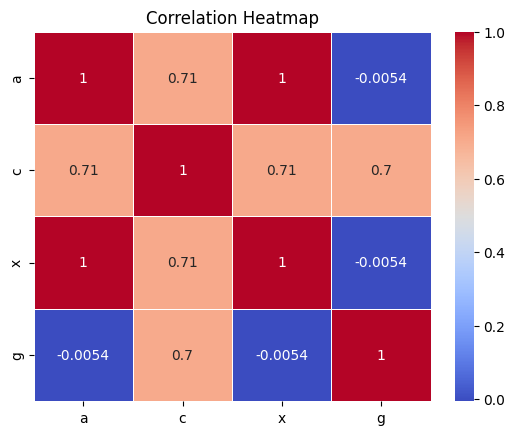

In [25]:
cols = ['a', 'c', 'x', 'g']
corr = df2[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

*Visualizzazione matrice di correlazione con tutte le colonne*

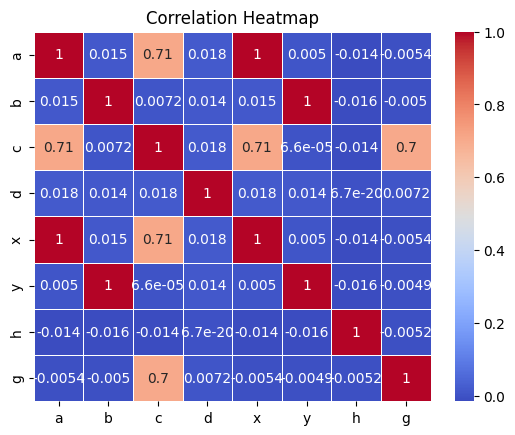

In [26]:
cols = ['a', 'b', 'c', 'd', 'x', 'y', 'h', 'g']
corr = df2[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Break2:
1)Plot the function y = log(x), how can you improve its plot in critical areas?

2)Recreate the following heatmaps:

### 1.

Considerando che la funzione y=log(x) è definita solo per 𝑥 > 0 (dominio) e il suo comportamento per 𝑥→0+ tende a -∞, evitiamo 𝑥=0.

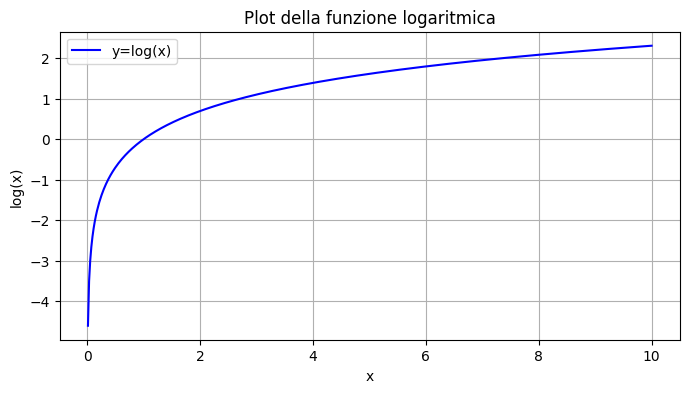

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.01, 10, 500)  # Evitiamo x=0 per evitare errori
y = np.log(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label="y=log(x)", color="b")

# Miglioramenti
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("Plot della funzione logaritmica")
plt.legend()
plt.grid()

### 2.

Cosa sono le heatmaps?
Le heatmap sono matrici di numeri rappresentate con una scala di colori. Servono per visualizzare distribuzioni di dati in 2D.

### 2.1

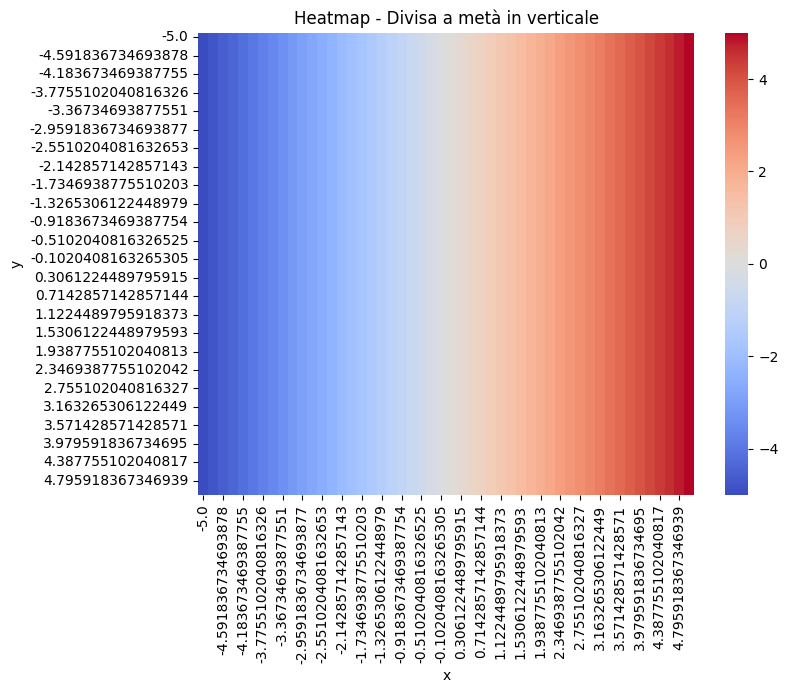

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creiamo la griglia
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Funzione per la divisione verticale
Z = X  # I valori aumentano da sinistra a destra

# Convertiamo in DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap - Divisa a metà in verticale')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 2.2

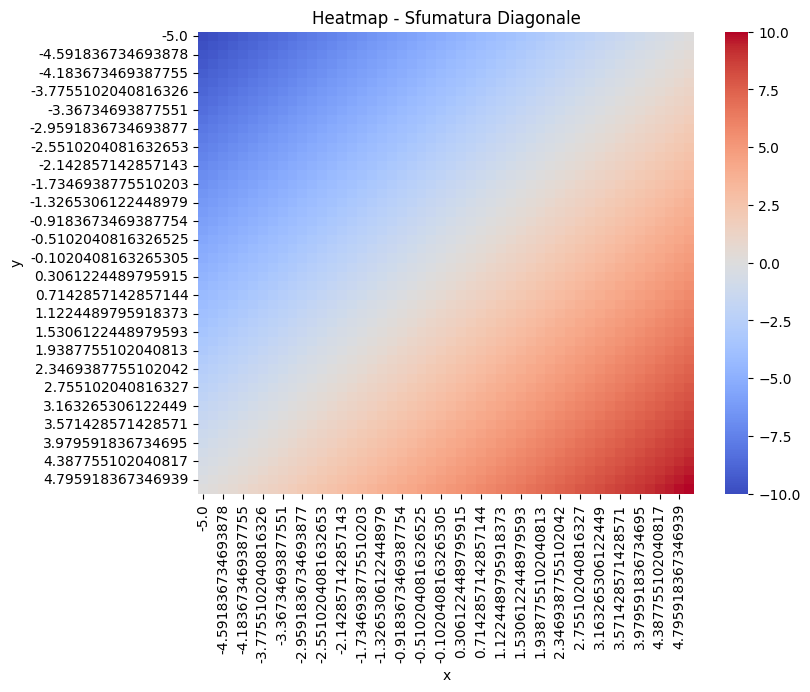

In [19]:
# Funzione per la sfumatura diagonale
Z = X + Y  # La variazione segue la diagonale

# Convertiamo in DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap - Sfumatura Diagonale')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
